In [348]:
# find the list of japanese makers
import wikipedia
content = wikipedia.page('List of automobile manufacturers of Japan')
makers = pd.DataFrame(content.content.split('\n'))
makers.columns = ['maker']
makers['maker']= makers.maker.str.replace(r"\(.*\)","").str.lower()
makers = makers.loc[makers['maker'].apply(lambda x: len(x.strip().split(' ')) == 1)]
makers['maker'] = makers['maker'].apply(str).apply(lambda x: x[:3])
makers['maker'].replace('', np.nan, inplace=True)
makers.dropna(inplace = True)
japanese_makers = makers.maker.sort_values().unique()

In [450]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
%matplotlib inline

In [63]:
df_original = pd.read_csv('Parking_Citations.csv')
df_original['ImportDate'] = pd.to_datetime(df_original.ImportDate)

In [475]:
ts = pd.to_datetime('01/01/2019')
df_original = df_original.loc[df_original.ImportDate < ts,:]

num_total_citations = df_original.shape[0]
df_original['ViolDate'] = pd.to_datetime(df_original.ViolDate)

In [477]:
df_original['ViolYear'] = df_original['ViolDate'].dt.year

num_for_years = pd.DataFrame(df_original.groupby('ViolYear').size())
num_for_years.reset_index(inplace = True)
num_for_years.rename(columns={0: "count"}, inplace = True)
num_for_years['ViolYear'] = num_for_years.ViolYear.apply(int)

num_between_2004_and_2014 = num_for_years.loc[num_for_years.ViolYear <= 2014].loc[2004 <= num_for_years.ViolYear]

x = num_between_2004_and_2014['ViolYear']
y = num_between_2004_and_2014['count']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('Linear regression slope:', slope)

Linear regression slope: 11219.690909090908


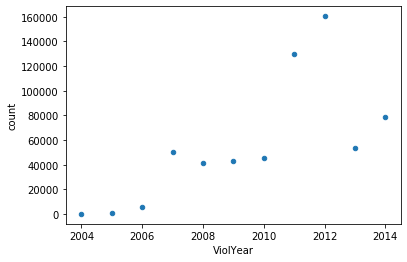

In [478]:
# plot the scatter 
num_between_2004_and_2014.plot.scatter('ViolYear','count') 

In [479]:
col_index = ['Citation','Make','ViolFine', 'OpenPenalty', 'ImportDate',
            'PoliceDistrict']
df = df_original[col_index]

In [480]:
# The mean violance Fine
print('mean violance fine:',"%.10f" % df.ViolFine.mean())

mean violance fine: 49.1241521102


In [483]:
# The number of rows with nonzero penalty fees
# df.OpenPenalty.astype(bool).sum(axis=0)

# The rows with nonzero penalty fees
# The 81th percentile of the penalty fees in the group of vehicles with open penalty fees
percent81 = df.OpenPenalty.loc[df.OpenPenalty.astype(bool) == 1].quantile(.81)
print('percentile_81:',"%.10f" % percent81)

percentile_81: 480.0000000000


In [491]:
# lowercase the PoliceDistricts
len(df.PoliceDistrict.unique())
df.dropna(subset=['PoliceDistrict'],inplace = True)
df['PoliceDistrict'] = df['PoliceDistrict'].str.lower()

# group the data by PoliceDistricts
grouped = df[['PoliceDistrict','ViolFine']].groupby('PoliceDistrict')

# Sort the groups by ViolFines
highest_mean = grouped.mean().sort_values(by=['ViolFine'], ascending = False).iloc[0]
print('Highest mean in nine police district:', highest_mean)

Highest mean in nine police district: ViolFine    60.89528
Name: southwestern, dtype: float64


In [489]:
ts1 = pd.to_datetime('01/01/2017')
ts2 = pd.to_datetime('01/01/2018')
df.dropna(subset=['Make'], inplace = True)
df['Make'] = df['Make'].str.lower()

# replace the name of the makes by the first three letters
df['Make'] = df.Make.apply(str).apply(lambda x: x[:3])

# Only consider the cases in 2017
df = df.loc[df.ImportDate < ts2,:].loc[ts1 <= df.ImportDate,:]

Grouped_by_Make = df.groupby('Make', as_index=True)

# find the list of top ten car makers
top_ten_ind = Grouped_by_Make.size().sort_values(ascending = False)[:10].index

# find the japanese makes in top ten list
japanese_top_ten_ind = [make for make in top_ten_ind if make in japanese_makers]

# find the number of cases whose car make is from japan and is in top ten
num_japanese_in_top_ten = df.loc[df['Make'].isin(japanese_top_ten_ind)].shape[0]

# calculate the proportions for the above cases in all citation cases
proportion = num_japanese_in_top_ten/num_total_citations
print('proportion:',"%.10f" % proportion)

proportion: 0.0722329530
